<a href="https://colab.research.google.com/github/LouisKimDev/MobilityVisionSystem/blob/main/MVS_midterm_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

In [ ]:
# 이미지 1: 꽃, 이미지 2: 사진사
# 임포트 후 그레이스케일일
flower = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/MVS_midterm_project/Copy of flower.bmp")
airplane = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/MVS_midterm_project/Copy of airplane.bmp")

flower_gray = cv2.cvtColor(flower, cv2.COLOR_BGR2GRAY)
airplane_gray = cv2.cvtColor(airplane, cv2.COLOR_BGR2GRAY)


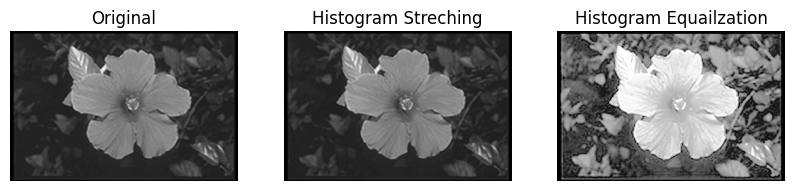

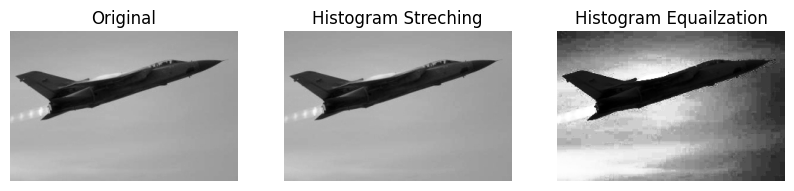

In [ ]:
# 히스토그램 스트레칭, 평활화

# Flower
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(flower_gray, cmap = 'gray')
plt.axis('off')

# 히스토그램 스트레칭
out_flower = flower_gray.copy()
width, height = flower_gray.shape
high = flower_gray.max()
low = flower_gray.min()

for i in range(width):
  for j in range(height):
    out_flower[i][j] = ((flower_gray[i][j] - low) * 255/(high-low))

plt.subplot(1,3,2)
plt. title("Histogram Streching")
plt.imshow(out_flower, cmap = 'gray')
plt.axis('off')

# 히스토그램 평활화
out2_flower = cv2.equalizeHist(flower_gray)
dst2_flower = np.hstack((flower_gray, out2_flower))

plt.subplot(1,3,3)
plt. title("Histogram Equailzation")
plt.imshow(out2_flower, cmap = 'gray')
plt.axis('off')
plt.show()

# airplane
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(airplane_gray, cmap = 'gray')
plt.axis('off')

# 히스토그램 스트레칭
out_airplane = airplane_gray.copy()
width, height = airplane_gray.shape
high = airplane_gray.max()
low = airplane_gray.min()

for i in range(width):
  for j in range(height):
    out_airplane[i][j] = ((airplane_gray[i][j] - low) * 255/(high-low))

plt.subplot(1,3,2)
plt. title("Histogram Streching")
plt.imshow(out_airplane, cmap = 'gray')
plt.axis('off')

# 히스토그램 평활화
out2_airplane = cv2.equalizeHist(airplane_gray)
dst2_airplane = np.hstack((airplane_gray, out2_airplane))

plt.subplot(1,3,3)
plt. title("Histogram Equailzation")
plt.imshow(out2_airplane, cmap = 'gray')
plt.axis('off')
plt.show()


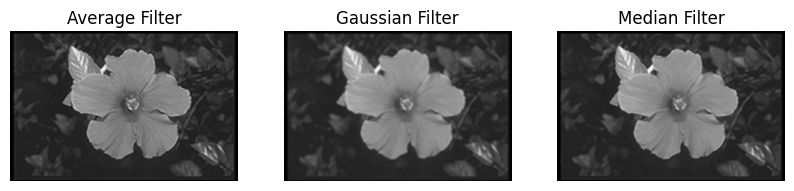

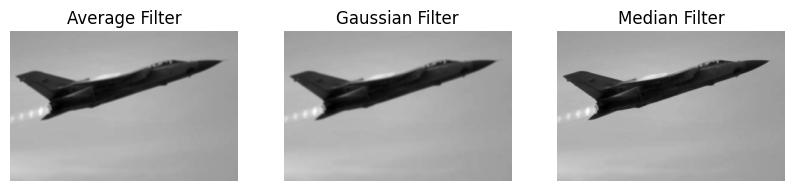

In [ ]:
# Filtering Noise removal

# Flower
# 1) Average filtering 적용 결과
ave_kernel = np.ones((3, 3), dtype = np.float_ )/ 9.0
ave_flower = cv2.filter2D(out_flower, -1, ave_kernel)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Average Filter")
plt.imshow(out_flower, cmap = 'gray')
plt.axis('off')
# 2) Gaussian filtering 적용 결과
gau_flower = cv2.GaussianBlur(out_flower, (0,0), 1)

plt.subplot(1,3,2)
plt. title("Gaussian Filter")
plt.imshow(gau_flower, cmap = 'gray')
plt.axis('off')
# 3) Median filtering 적용 결과
med_flower = cv2.medianBlur(out_flower, 3)

plt.subplot(1,3,3)
plt. title("Median Filter")
plt.imshow(med_flower, cmap = 'gray')
plt.axis('off')
plt.show()

# Airplane
# 1) Average filtering 적용 결과
ave_kernel = np.ones((3, 3), dtype = np.float_ )/ 9.0
ave_airplane = cv2.filter2D(out_airplane, -1, ave_kernel)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Average Filter")
plt.imshow(ave_airplane, cmap = 'gray')
plt.axis('off')
# 2) Gaussian filtering 적용 결과
gau_airplane = cv2.GaussianBlur(out_airplane, (0,0), 1)

plt.subplot(1,3,2)
plt. title("Gaussian Filter")
plt.imshow(gau_airplane, cmap = 'gray')
plt.axis('off')
# 3) Median filtering 적용 결과
med_airplane = cv2.medianBlur(out_airplane, 3)

plt.subplot(1,3,3)
plt. title("Median Filter")
plt.imshow(med_airplane, cmap = 'gray')
plt.axis('off')
plt.show()


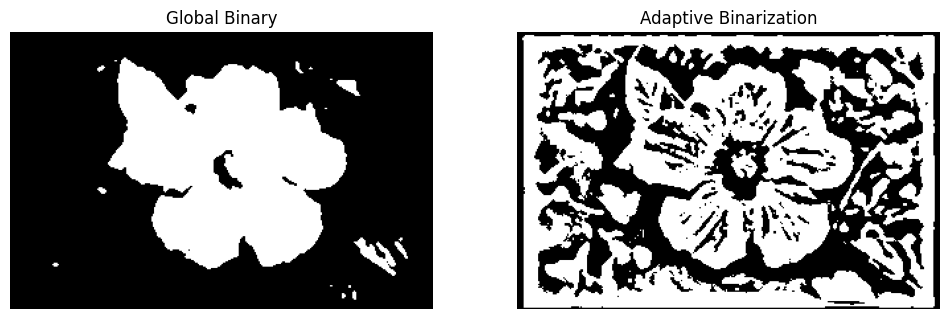

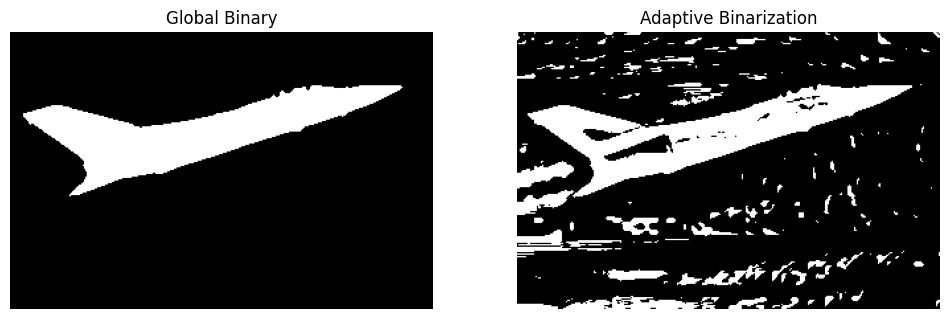

In [ ]:
# Binarization
def globalTreshold(input_img):
  G1 = []
  G2 = []
  T0 = 0.1 # Global Threshold
  T1 = 100 # initial Threshold
  T2 = 100
  key = True
  width, height = input_img.shape

  # 초기 임계값과 보정 후 임계값이 종료조건 T0보다 작을 때 까지 반복
  while(key):
    T1 = T2
    for i in range(width):
      for j in range(height):
          if input_img[i][j] > T1:
            G1.append(input_img[i][j])
          else:
            G2.append(input_img[i][j])

    T2 = (( np.mean(G1) + np.mean(G2) )/2)
    if (abs(T1-T2)<T0):
      key = False
  return T2

# Flower
# 전역임계값으로 이진화 
ret, bin_flower = cv2.threshold(med_flower, globalTreshold(med_flower), 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Global Binary")
plt.imshow(bin_flower,cmap = 'gray')
plt.axis('off')
# 적응형 이진화
adbin_flower = cv2.adaptiveThreshold(med_flower, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, 2)
plt.subplot(1,2,2)
plt.title("Adaptive Binarization")
plt.imshow(adbin_flower, cmap = 'gray')
plt.axis('off')
plt.show()

# Airplane
# 전역임계값으로 이진화 
ret, bin_airplane = cv2.threshold(med_airplane, globalTreshold(med_airplane), 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Global Binary")
plt.imshow(bin_airplane,cmap = 'gray')
plt.axis('off')
# 적응형 이진화
adbin_airplane = cv2.adaptiveThreshold(med_airplane, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 2)
plt.subplot(1,2,2)
plt.title("Adaptive Binarization")
plt.imshow(adbin_airplane, cmap = 'gray')
plt.axis('off')
plt.show()


(-0.5, 319.5, 209.5, -0.5)

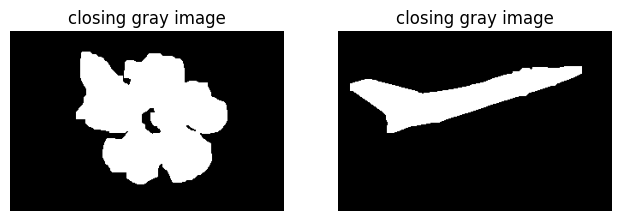

In [ ]:
# 모폴로지 연산
# Flower
kernel = np.ones((9,9),np.uint8)
closing_flower = cv2.morphologyEx(bin_flower, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(12,7))
plt.subplot(1,3,1)
plt.title("closing gray image")
plt.imshow(closing_flower,cmap = 'gray')
plt.axis('off')
# Airplane
kernel = np.ones((9,9),np.uint8)
closing_airplane = cv2.morphologyEx(bin_airplane, cv2.MORPH_OPEN, kernel)
plt.subplot(1,3,2)
plt.title("closing gray image")
plt.imshow(closing_airplane,cmap = 'gray')
plt.axis('off')


(-0.5, 319.5, 209.5, -0.5)

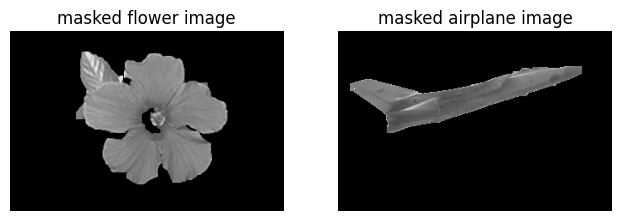

In [ ]:
# 배경 제거
# Flower
and_flower = cv2.bitwise_and(closing_flower, flower_gray)
plt.figure(figsize=(12,7))
plt.subplot(1,3,1)
plt.title("masked flower image")
plt.imshow(and_flower,cmap = 'gray')
plt.axis('off')
# Airplane
and_airplane = cv2.bitwise_and(closing_airplane, airplane_gray)
plt.subplot(1,3,2)
plt.title("masked airplane image")
plt.imshow(and_airplane,cmap = 'gray')
plt.axis('off')


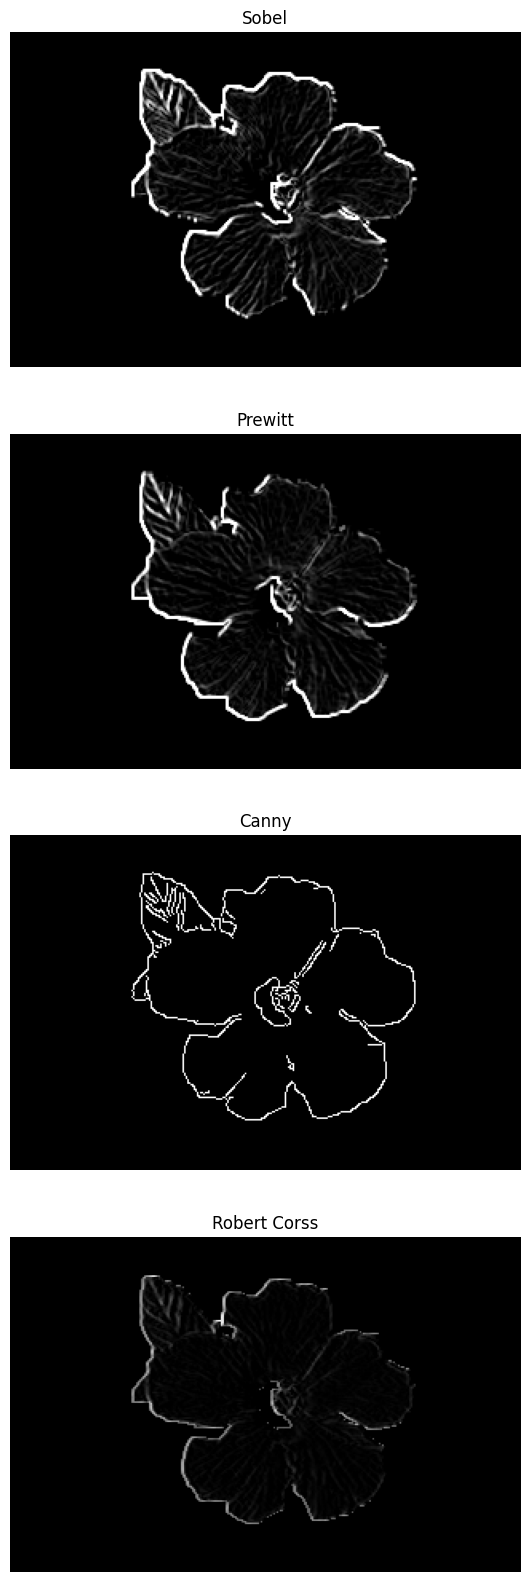

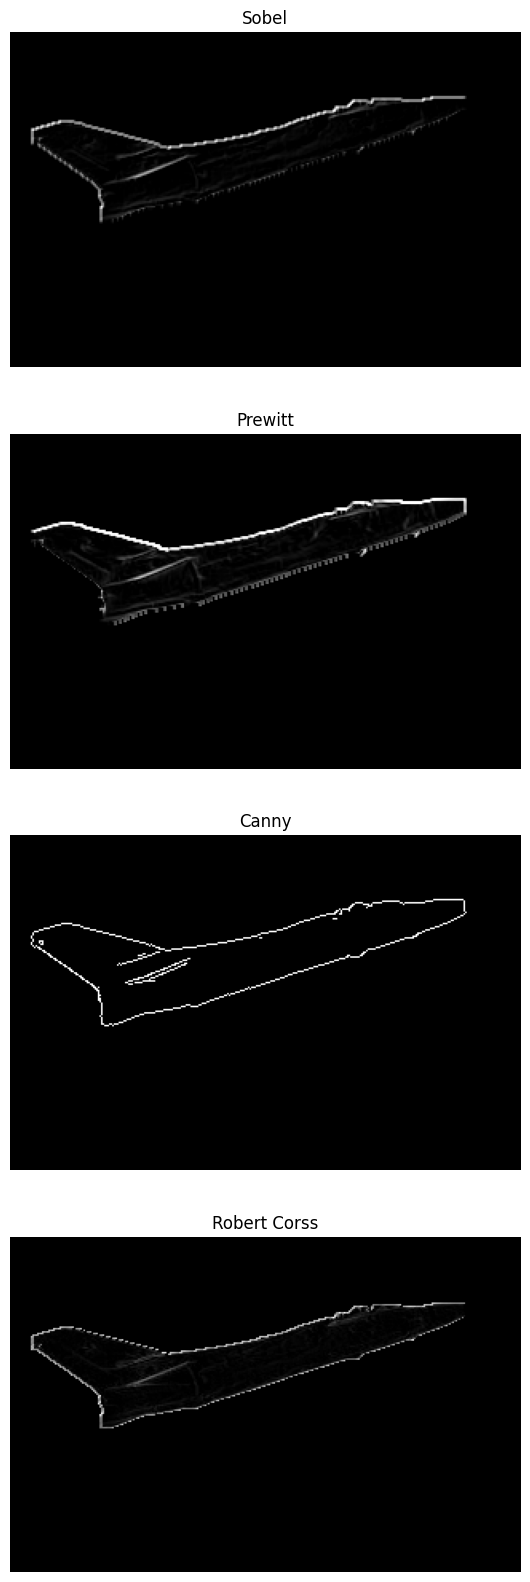

In [ ]:
# 윤곽선 추출
# Flower
# 1) sobel 적용 후 엣지 검출
Q3_x = cv2.Sobel(and_flower, -1, 1, 0)
Q3_y = cv2.Sobel(and_flower, -1, 0, 1)
sobel_x = cv2.convertScaleAbs(Q3_x)
soble_y = cv2.convertScaleAbs(Q3_y)
Q3_1 = cv2.addWeighted(sobel_x, 1, soble_y, 1, 0)

plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt. title("Sobel")
plt.imshow(Q3_1, cmap = 'gray')
plt.axis('off')
# 2) prewitt 적용 후 엣지 검출
prewitt_x = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_x = cv2.convertScaleAbs(cv2.filter2D(and_flower, -1, prewitt_x))
prewitt_y = cv2.convertScaleAbs(cv2.filter2D(and_flower, -1, prewitt_y))
Q3_2 = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)

plt.subplot(4,1,2)
plt. title("Prewitt")
plt.imshow(Q3_2, cmap = 'gray')
plt.axis('off')
# 3) canny 적용 후 엣지 검출
Q3_3 = cv2.Canny(and_flower, 100, 200)
plt.subplot(4,1,3)
plt. title("Canny")
plt.imshow(Q3_3, cmap = 'gray')
plt.axis('off')
# 4) robert cross 적용 후 엣지 검출
roberts_x = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]])
roberts_y = np.array([[0, 0, 1], [0, -1, 0], [0, 0, 0]])
roberts_x = cv2.convertScaleAbs(cv2.filter2D(and_flower, -1, roberts_x))
roberts_y = cv2.convertScaleAbs(cv2.filter2D(and_flower, -1, roberts_y))
Q3_4 = cv2.addWeighted(roberts_x, 1, roberts_y, 1, 0)

plt.subplot(4,1,4)
plt. title("Robert Corss")
plt.imshow(Q3_4, cmap = 'gray')
plt.axis('off')
plt.show()

# Airplane
# 1) sobel 적용 후 엣지 검출
Q3_x = cv2.Sobel(and_airplane, -1, 1, 0)
Q3_y = cv2.Sobel(and_airplane, -1, 0, 1)
sobel_x = cv2.convertScaleAbs(Q3_x)
soble_y = cv2.convertScaleAbs(Q3_y)
Q3_1 = cv2.addWeighted(sobel_x, 0.5, soble_y, 0.5, 0)

plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt. title("Sobel")
plt.imshow(Q3_1, cmap = 'gray')
plt.axis('off')
# 2) prewitt 적용 후 엣지 검출
prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_x = cv2.convertScaleAbs(cv2.filter2D(and_airplane, -1, prewitt_x))
prewitt_y = cv2.convertScaleAbs(cv2.filter2D(and_airplane, -1, prewitt_y))
Q3_2 = cv2.addWeighted(prewitt_x, 1, prewitt_y, 1, 0)

plt.subplot(4,1,2)
plt. title("Prewitt")
plt.imshow(Q3_2, cmap = 'gray')
plt.axis('off')
# 3) canny 적용 후 엣지 검출
Q3_3 = cv2.Canny(and_airplane, 100, 200)
plt.subplot(4,1,3)
plt. title("Canny")
plt.imshow(Q3_3, cmap = 'gray')
plt.axis('off')
# 4) robert cross 적용 후 엣지 검출
roberts_x = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]])
roberts_y = np.array([[0, 0, 1], [0, -1, 0], [0, 0, 0]])
roberts_x = cv2.convertScaleAbs(cv2.filter2D(and_airplane, -1, roberts_x))
roberts_y = cv2.convertScaleAbs(cv2.filter2D(and_airplane, -1, roberts_y))
Q3_4 = cv2.addWeighted(roberts_x, 1, roberts_y, 1, 0)

plt.subplot(4,1,4)
plt. title("Robert Corss")
plt.imshow(Q3_4, cmap = 'gray')
plt.axis('off')
plt.show()


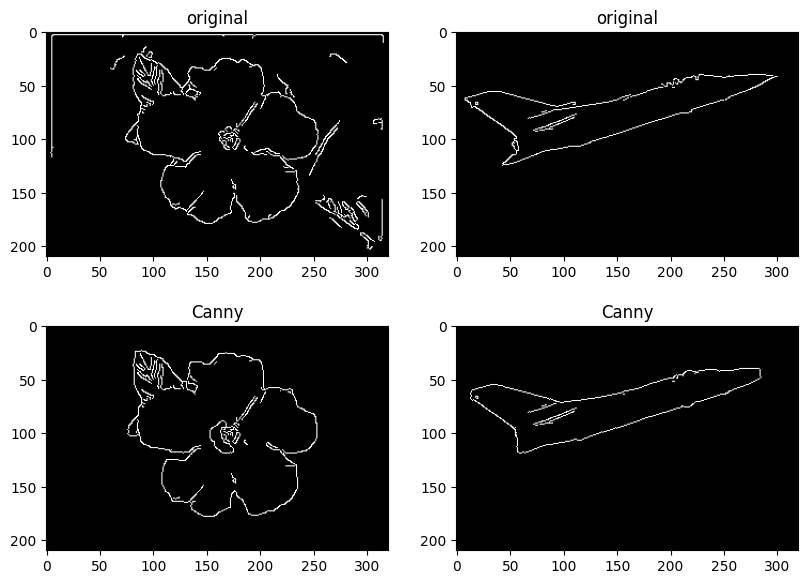

In [ ]:
Q3_3 = cv2.Canny(flower_gray, 100, 200)
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.title("original")
plt.imshow(Q3_3, cmap = 'gray')

Q3_3 = cv2.Canny(airplane_gray, 100, 200)
plt.subplot(2,3,2)
plt.title("original")
plt.imshow(Q3_3, cmap = 'gray')

Q3_3 = cv2.Canny(and_flower, 100, 200)
plt.subplot(2,3,4)
plt.title("Canny")
plt.imshow(Q3_3, cmap = 'gray')

Q3_3 = cv2.Canny(and_airplane, 100, 200)
plt.subplot(2,3,5)
plt.title("Canny")
plt.imshow(Q3_3, cmap = 'gray')